# Introduction

## Setup

First, check if you are at the correct project environment.

In [ ]:
using Pkg
Pkg.status()

Then check if all packages are installed and up to date:

In [ ]:
Pkg.update()

In [3]:
using ExperimentalDesign, StatsModels, GLM, DataFrames, Distributions, Random, StatsPlots

# Designs with Categorical Factors

In [10]:
design_distribution = DesignDistribution((ksp_type = CategoricalFactor(["cg", "gmres", "fcg", "tcqmr", "cgs", "bcgs", "tfqmr", "cr", "gcr"]),
        pc_type = CategoricalFactor(["jacobi", "sor", "bjacobi", "mg"])))

DesignDistribution
Formula: 0 ~ ksp_type + pc_type
Factor Distributions:
ksp_type: CategoricalFactor(
values: ["cg", "gmres", "fcg", "tcqmr", "cgs", "bcgs", "tfqmr", "cr", "gcr"]
distribution: DiscreteUniform(a=1, b=9)
)

pc_type: CategoricalFactor(
values: ["jacobi", "sor", "bjacobi", "mg"]
distribution: DiscreteUniform(a=1, b=4)
)


In [56]:
design = rand(design_distribution, 300)
f = @formula 0 ~ ksp_type + pc_type
optimal_design = OptimalDesign(design, f, 10)

OptimalDesign
Dimension: (10, 2)
Factors: (ksp_type = CategoricalFactor(
values: ["cg", "gmres", "fcg", "tcqmr", "cgs", "bcgs", "tfqmr", "cr", "gcr"]
distribution: DiscreteUniform(a=1, b=9)
)
, pc_type = CategoricalFactor(
values: ["jacobi", "sor", "bjacobi", "mg"]
distribution: DiscreteUniform(a=1, b=4)
)
)
Formula: 0 ~ ksp_type + pc_type
Selected Candidate Rows: [48, 77, 87, 73, 97, 82, 4, 16, 15, 12]
Optimality Criteria: Dict(:D => 0.003760603107553415)
Design Matrix:
10×2 DataFrame
│ Row │ ksp_type │ pc_type │
│     │ String   │ String  │
├─────┼──────────┼─────────┤
│ 1   │ cg       │ mg      │
│ 2   │ gcr      │ jacobi  │
│ 3   │ cg       │ sor     │
│ 4   │ gcr      │ mg      │
│ 5   │ cr       │ bjacobi │
│ 6   │ tfqmr    │ mg      │
│ 7   │ fcg      │ jacobi  │
│ 8   │ tcqmr    │ bjacobi │
│ 9   │ tcqmr    │ sor     │
│ 10  │ cgs      │ jacobi  │

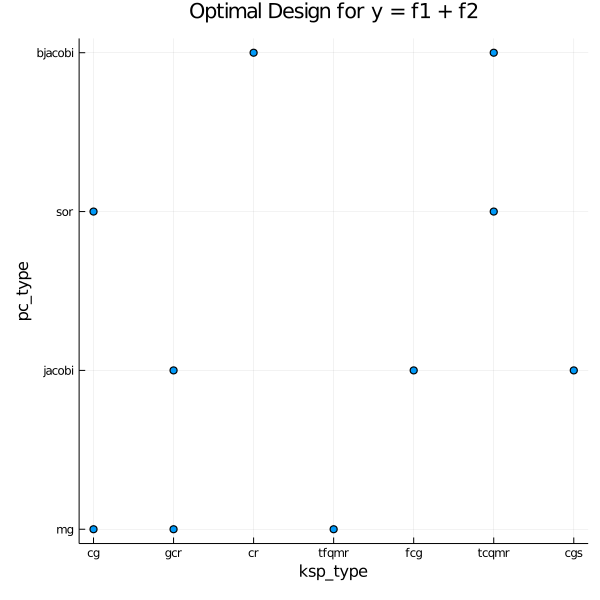

In [58]:
@df optimal_design.matrix scatter(:ksp_type,
    :pc_type,
    size = (600, 600),
    xlabel = "ksp_type",
    ylabel = "pc_type",
    legend = false,
    title = "Optimal Design for y = f1 + f2")

In [57]:
for experiment in eachrow(optimal_design.matrix)
    parameters = ""
    for i in 1:length(experiment)
        parameters *= "-" * string(keys(experiment)[i]) * " " * experiment[i] * " "
    end
    println(parameters)
end

-ksp_type cg -pc_type mg 
-ksp_type gcr -pc_type jacobi 
-ksp_type cg -pc_type sor 
-ksp_type gcr -pc_type mg 
-ksp_type cr -pc_type bjacobi 
-ksp_type tfqmr -pc_type mg 
-ksp_type fcg -pc_type jacobi 
-ksp_type tcqmr -pc_type bjacobi 
-ksp_type tcqmr -pc_type sor 
-ksp_type cgs -pc_type jacobi 
